In [237]:
student_name= 'aditya agarwal'
student_id= '46184821'

## Portfolio Part 3

In this Portfolio task, you will continue working with the dataset you have used in portfolio 2. But the difference is that the rating column has been changed with like or dislike values. Your task is to train classification models to predict whether a user like or dislike an item.  


The header of the csv file is shown below. 

| userId | timestamp | review | item| rating | helpfulness | gender | category |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __timestamp__ - the timestamp indicating when the user rated the shopping item
* __review__ - the user's review comments of the item
* __item__ - the name of the item
* __rating__ - the user like or dislike the item
* __helpfulness__ - average rating from other users on whether the review comment is helpful. 6-helpful, 0-not helpful. 
* __gender__ - the gender of the user, F- female, M-male
* __category__ - the category of the shopping item


Your high level goal in this notebook is to try to build and evaluate predictive models for 'rating' from other available features - predict the value of the __rating__ field in the data from some of the other fields. More specifically, you need to complete the following major steps: 
1) Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values.
2) Convert object features into digit features by using an encoder
3) Study the correlation between these features. 
4) Split the dataset and train a logistic regression model to predict 'rating' based on other features. Evaluate the accuracy of your model.
5) Split the dataset and train a KNN model to predict 'rating' based on other features. You can set K with an ad-hoc manner in this step. Evaluate the accuracy of your model.
6) Tune the hyper-parameter K in KNN to see how it influences the prediction performance

Note 1: We did not provide any description of each step in the notebook. You should learn how to properly comment your notebook by yourself to make your notebook file readable. 

Note 2: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use both ___Logistic Regression model___ and ___KNN model___ for solving this classification problem. Accordingly, discuss the performance of these two methods.

In [238]:
# importing all libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 


import warnings
warnings.filterwarnings('ignore')

In [239]:
# read the data file (.csv format)
df = pd.read_csv('Portfolio 3.csv')

# printing the first ten rows of the dataset
df.head(10)

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,like,4,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,like,4,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,like,4,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,like,3,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,dislike,4,F,Movies
5,4259,12100,Come here at least once in your life... stay a...,New York City,like,4,F,Hotels & Travel
6,4259,12400,"I joined for the free camera, and stood for no...",Earthlink,like,3,F,Online Stores & Services
7,4259,12700,They Should've Fooled the American Public,Blair Witch Project,dislike,4,F,Movies
8,4259,51600,A Short List of Things to Remember in NYC,New York City,like,4,F,Hotels & Travel
9,4259,60200,Do you know what a metaphysical can of worms t...,Being John Malkovich,like,4,F,Movies


In [240]:
# displaying the dataset and its length
df

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,like,4,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,like,4,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,like,4,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,like,3,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,dislike,4,F,Movies
...,...,...,...,...,...,...,...,...
2894,10815,112799,I dare you to sleep through this soon to be cl...,Sleepy Hollow,like,4,F,Movies
2895,10815,121299,Another movie to keep us out of the water!!!!,Deep Blue Sea,like,3,F,Movies
2896,10815,121399,Miles above other films.,Green Mile,like,4,F,Movies
2897,10815,121499,This could be the beginning of a comedy era.,Austin Powers: The Spy Who Shagged Me,dislike,4,F,Movies


# Exploring the data

In [241]:
# displaying the info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   userId       2899 non-null   int64 
 1   timestamp    2899 non-null   int64 
 2   review       2899 non-null   object
 3   item         2899 non-null   object
 4   rating       2899 non-null   object
 5   helpfulness  2899 non-null   int64 
 6   gender       2899 non-null   object
 7   category     2899 non-null   object
dtypes: int64(3), object(5)
memory usage: 181.3+ KB


In [242]:
# description of the dataframe
df.describe()

,userId,timestamp,helpfulness
count,2899.000000,2899.000000,2899.000000
mean,5430.148672,56403.285271,3.875474
std,3460.227028,37664.826368,0.330237
min,46.000000,10100.000000,3.000000
25%,1676.000000,20500.000000,4.000000
50%,5985.000000,52101.000000,4.000000
75%,8626.000000,82500.000000,4.000000
max,10815.000000,123199.000000,4.000000


In [243]:
# displaying the shape of the data

df.shape

(2899, 8)

In [244]:
# counting the size of the data

df.count()

userId         2899
timestamp      2899
review         2899
item           2899
rating         2899
helpfulness    2899
gender         2899
category       2899
dtype: int64

In [245]:
# counting the size of the data using len() function

rows = len(df.axes[0])
cols = len(df.axes[1])
print(rows)
print(cols)

2899
8


In [246]:
# displaying the columns in the dataframe

df.columns

Index(['userId', 'timestamp', 'review', 'item', 'rating', 'helpfulness',
       'gender', 'category'],
      dtype='object')

In [247]:
# cleaning the dataset

data_frame=df.drop(['timestamp', 'userId', 'item'], axis=1)


In [248]:
data_frame.dropna()

,review,rating,helpfulness,gender,category
0,"Finally, Something for (Relatively) Nothing",like,4,F,Online Stores & Services
1,Shocking!,like,4,F,Movies
2,Simply Shaggadelic!,like,4,F,Movies
3,Better Than The First!,like,3,F,Movies
4,Blair Witch made me appreciate this,dislike,4,F,Movies
...,...,...,...,...,...
2894,I dare you to sleep through this soon to be cl...,like,4,F,Movies
2895,Another movie to keep us out of the water!!!!,like,3,F,Movies
2896,Miles above other films.,like,4,F,Movies
2897,This could be the beginning of a comedy era.,dislike,4,F,Movies


In [249]:
# identifying missing/null values 

data_frame.isnull().sum()

review         0
rating         0
helpfulness    0
gender         0
category       0
dtype: int64

In [250]:
# shape of the data

print(data_frame.shape)

(2899, 5)


In [251]:
# seaborn library-> count plot use for ratings, gender values, varies categories etc. [not apply for user id, timestamp, item]

#sns.countplot(x='item', y='rating', hue='gender', data=data_frame)


# Converting object features into digit features

categorical features=> numerical values

In [252]:
# converting the categorical values into numeric values for 'review'

ord_enc = OrdinalEncoder()

data_frame["review code"] = ord_enc.fit_transform(data_frame[["review"]])
data_frame[["review", "review code"]]

,review,review code
0,"Finally, Something for (Relatively) Nothing",856.0
1,Shocking!,1985.0
2,Simply Shaggadelic!,2006.0
3,Better Than The First!,472.0
4,Blair Witch made me appreciate this,493.0
...,...,...
2894,I dare you to sleep through this soon to be cl...,1221.0
2895,Another movie to keep us out of the water!!!!,379.0
2896,Miles above other films.,1546.0
2897,This could be the beginning of a comedy era.,2431.0


In [253]:
# converting the categorical values into numeric values for 'rating'

ord_enc = OrdinalEncoder()

data_frame["rating code"] = ord_enc.fit_transform(data_frame[["rating"]])
data_frame[["rating", "rating code"]]

,rating,rating code
0,like,1.0
1,like,1.0
2,like,1.0
3,like,1.0
4,dislike,0.0
...,...,...
2894,like,1.0
2895,like,1.0
2896,like,1.0
2897,dislike,0.0


In [254]:
# converting the categorical values into numeric values for 'category'

ord_enc = OrdinalEncoder()

data_frame["category code"] = ord_enc.fit_transform(data_frame[["category"]])
data_frame[["category", "category code"]]

,category,category code
0,Online Stores & Services,6.0
1,Movies,5.0
2,Movies,5.0
3,Movies,5.0
4,Movies,5.0
...,...,...
2894,Movies,5.0
2895,Movies,5.0
2896,Movies,5.0
2897,Movies,5.0


In [255]:
# converting the categorical values into numeric values for 'gender'

ord_enc = OrdinalEncoder()

data_frame["gender code"] = ord_enc.fit_transform(data_frame[["gender"]])
data_frame[["gender", "gender code"]]


,gender,gender code
0,F,0.0
1,F,0.0
2,F,0.0
3,F,0.0
4,F,0.0
...,...,...
2894,F,0.0
2895,F,0.0
2896,F,0.0
2897,F,0.0


In [256]:
data_frame.head(15)

,review,rating,helpfulness,gender,category,review code,rating code,category code,gender code
0,"Finally, Something for (Relatively) Nothing",like,4,F,Online Stores & Services,856.0,1.0,6.0,0.0
1,Shocking!,like,4,F,Movies,1985.0,1.0,5.0,0.0
2,Simply Shaggadelic!,like,4,F,Movies,2006.0,1.0,5.0,0.0
3,Better Than The First!,like,3,F,Movies,472.0,1.0,5.0,0.0
4,Blair Witch made me appreciate this,dislike,4,F,Movies,493.0,0.0,5.0,0.0
5,Come here at least once in your life... stay a...,like,4,F,Hotels & Travel,599.0,1.0,2.0,0.0
6,"I joined for the free camera, and stood for no...",like,3,F,Online Stores & Services,1232.0,1.0,6.0,0.0
7,They Should've Fooled the American Public,dislike,4,F,Movies,2415.0,0.0,5.0,0.0
8,A Short List of Things to Remember in NYC,like,4,F,Hotels & Travel,136.0,1.0,2.0,0.0
9,Do you know what a metaphysical can of worms t...,like,4,F,Movies,692.0,1.0,5.0,0.0


# Correlation

In [257]:
# displaying the correlation for different features in the dataframe
# df.corr()

data_frame.corr()

,helpfulness,review code,rating code,category code,gender code
helpfulness,1.000000,0.016170,-0.016850,-0.000189,-0.046627
review code,0.016170,1.000000,-0.046935,0.012047,-0.014422
rating code,-0.016850,-0.046935,1.000000,-0.116312,0.022576
category code,-0.000189,0.012047,-0.116312,1.000000,-0.017644
gender code,-0.046627,-0.014422,0.022576,-0.017644,1.000000


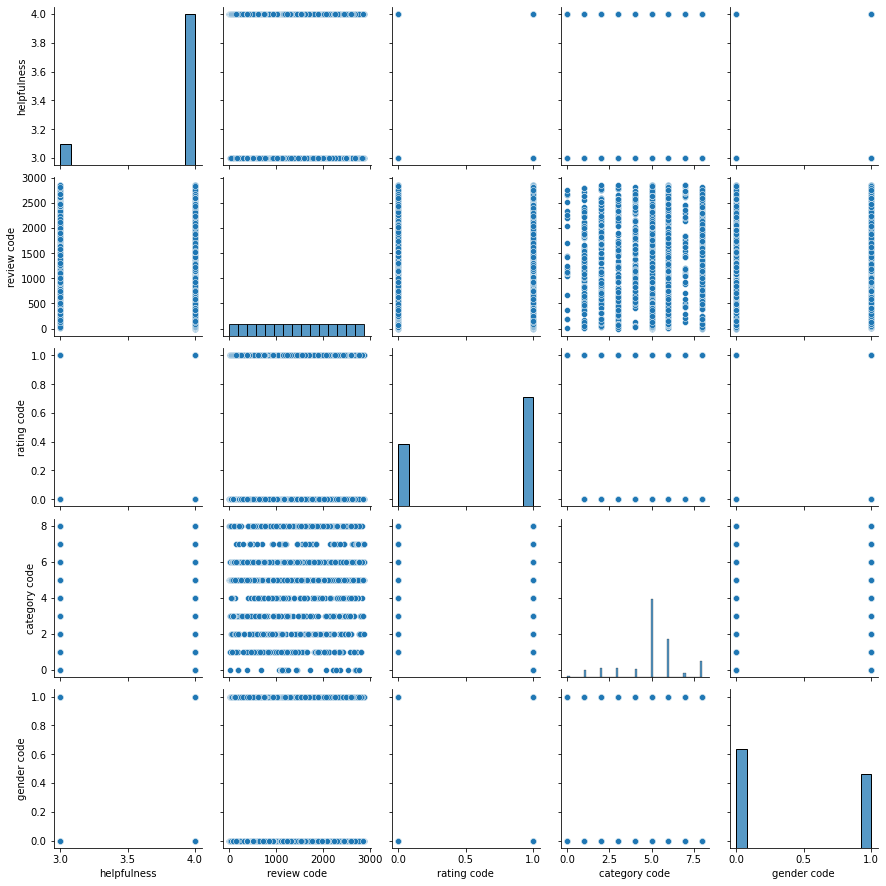

In [258]:
# displaying the correlatin for different features using pairplot

sns.pairplot(data=data_frame)



**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = O_1x + O_2$$

**Logistic regression:** log-odds of a categorical response being "true (1)" is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = O_1x + O_2$$

This is called the **logit function**.

# Split the dataset

In [259]:
# Spliting the data into training(80%) and testing data (20%) and using random_state=12

# use any train/test(10/20/30) size 
# use the train test method to split the dataset
train, test= train_test_split(data_frame, test_size=0.3, random_state=42)

In [260]:
# printing the shape/size of the dataframes after splitting the data

print('the number of rows in training data are:', train.shape[0])
print('the number of columns in training data are:', train.shape[1])

print('')
print('')

print('the number of rows in testing data are:', test.shape[0])
print('the number of columns in testing data are:', test.shape[1])

the number of rows in training data are: 2029
the number of columns in training data are: 9


the number of rows in testing data are: 870
the number of columns in testing data are: 9


# Train and applying the Logistic Regression Model

In [262]:
# input the data for this logistic regression model

# train the model
x_train= train[['helpfulness', 'review code', 'category code', 'gender code']]
y_train= train['rating code']

x_test= test[['helpfulness','review code', 'category code', 'gender code']]
y_test= test['rating code']


In [263]:
# Building the Logistic Regression model

model= linear_model.LogisticRegression()

# fit the model using .fit method
model.fit(x_train, y_train)

LogisticRegression()

In [264]:
# Do predictions on test set

# predict the train dataset
train_predicted= model.predict(x_train)

# predict the test dataset
test_predicted= model.predict(x_test)

# Logistic Regression Evaluation 

-  SKlearn has some useful tools, the accuracy_score function gives a score from 0-1 for the proportion correct. 
- The confusion_matrix function shows how many were classified correctly and what errors were made.

In [265]:
# Evaluating the performance of the trained model
print('             The accuracy_score function gives a score from 0-1 for the proportion correct')
print('')

# calculate the accuracy of the training data in the logistic regression model
print('The accuracy of training data is:', accuracy_score(y_train, train_predicted))

# calculate the accuracy of the testing data in the logistic regression model
print('The accuracy of testing data is:', accuracy_score(y_test, test_predicted))

             The accuracy_score function gives a score from 0-1 for the proportion correct

The accuracy of training data is: 0.6367668802365697
The accuracy of testing data is: 0.6252873563218391


In [266]:
# The confusion_matrix function shows how many are classified correctly and what errors were made

print(confusion_matrix(y_train, train_predicted))

print('')

print(confusion_matrix(y_test, test_predicted))


[[  20  708]
 [  29 1272]]

[[  9 313]
 [ 13 535]]


In [267]:
# enhanced code readability
print('                                       Training Data')
print('')

# printing the mse and rmse for the training data
print('mean squared error of training data:', mean_squared_error(y_train, train_predicted))
print('root mean squared error of training data:', np.sqrt(mean_squared_error(y_train, train_predicted)))

                                       Training Data

mean squared error of training data: 0.36323311976343026
root mean squared error of training data: 0.6026882442552122


In [268]:
# enhanced code readability
print('                                       Testing Data')
print('')

# printing the mse and rmse for the testing data
print('mean squared error of testing data:', mean_squared_error(y_test, test_predicted))
print('root mean squared error of testing data:', np.sqrt(mean_squared_error(y_test, test_predicted)))

                                       Testing Data

mean squared error of testing data: 0.37471264367816093
root mean squared error of testing data: 0.6121377652768705


# Tune the Logistic Regression Model by feature selection

#### The sklearn RFE function implements Recursive Feature Estimation which removes features one by one, evaluating the model each time and selecting the best model for a target number of features. 

### Analysis of feature Selection

* Build a model and need to select which features to use
* Adding all features we have
    * Can be harmful
    * More features means more complex model (more parameters to estimate)
    * Need more data to get good estimates
    * The Curse of Dimensionality
* Prefer to select the most useful features
* Remove features that don't help


In [269]:
# building the model
lmodel= linear_model.LogisticRegression()
selector= RFE(lmodel, n_features_to_select=3, step=1)

# fitting the model 
selector.fit(x_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=3)

In [270]:
# predicting the model

train_fpredicted= selector.predict(x_train)
test_fpredicted= selector.predict(x_test)

In [271]:
# calculating the accuracy

print('The accuracy of training data is:', accuracy_score(y_train, train_fpredicted))
print('The accuracy of testing data is:', accuracy_score(y_test, test_fpredicted))



The accuracy of training data is: 0.6382454411039921
The accuracy of testing data is: 0.6114942528735632


## Evaluating the testing data

In [272]:

selector.ranking_

array([1, 2, 1, 1])

In [273]:
for i in range (x_train.shape[1]):
    print('columns:{} Ranked as: {}'.format(i, selector.ranking_[i]))

columns:0 Ranked as: 1
columns:1 Ranked as: 2
columns:2 Ranked as: 1
columns:3 Ranked as: 1


In [274]:
# calculating the accuracy_score

acc_score= []
for i in range (1,5):
    lmodel= linear_model.LogisticRegression()
    selector= RFE(lmodel, n_features_to_select=i)
    selector.fit(x_train, y_train)
    y_pred= selector.predict(x_test)
    acc_scores= accuracy_score(y_test, y_pred)
    print('accuracy on the test data for feature:', i, 'is:', acc_scores)
    acc_score.append(acc_scores)

accuracy on the test data for feature: 1 is: 0.6298850574712643
accuracy on the test data for feature: 2 is: 0.6298850574712643
accuracy on the test data for feature: 3 is: 0.6114942528735632
accuracy on the test data for feature: 4 is: 0.6252873563218391


In [275]:
acc_score

[0.6298850574712643,
 0.6298850574712643,
 0.6114942528735632,
 0.6252873563218391]

Text(0.5, 1.0, 'Test Data')

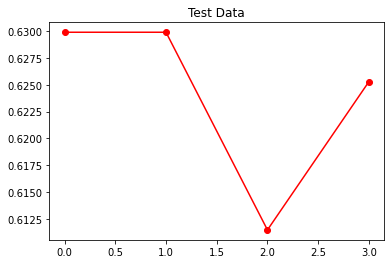

In [276]:


plt.plot(acc_score, marker='o', color='red')
plt.title('Test Data')

### Analysis of Recursive Feature Elimination

* To find the best features, eliminate the least useful features one by one
* Train a model on all features
* Choose the least important feature, eliminate it 
* Repeat training on samller set of features
* Until we have the target number of features


## Evaluating the training data

In [277]:
# calculating the accuracy_score for training data

acc_score= []
for i in range (1,5):
    lmodel= linear_model.LogisticRegression()
    selector= RFE(lmodel, n_features_to_select=i)
    selector.fit(x_train, y_train)
    y_pred= selector.predict(x_train)
    acc_scores= accuracy_score(y_train, y_pred)
    print('accuracy on the test data for feature:', i, 'is:', acc_scores)
    acc_score.append(acc_scores)

accuracy on the test data for feature: 1 is: 0.6412025628388369
accuracy on the test data for feature: 2 is: 0.6412025628388369
accuracy on the test data for feature: 3 is: 0.6382454411039921
accuracy on the test data for feature: 4 is: 0.6367668802365697


In [278]:
acc_score

[0.6412025628388369,
 0.6412025628388369,
 0.6382454411039921,
 0.6367668802365697]

Text(0.5, 1.0, 'Training Data')

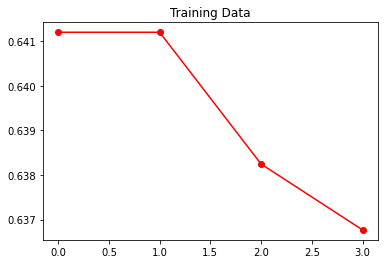

In [279]:


plt.plot(acc_score, marker='o', color='red')
plt.title('Training Data')

## Analysis of Regression Models 

- Fit a linear model to a set of data to predict an outcome
- Linear Regression for continuous variables
- Logistic Regression for categorical variables
- Model coefficients are obtained analytically (via a formula)
- Model is highly interpretable
- Can perform well with a small number of observations
- Can use multiple input variables
- Assumes a linear relationship
- Assumes features are independant




# KNN MODEL

In [280]:
# a look at the data_frame
# shape of the data_frame

data_frame

,review,rating,helpfulness,gender,category,review code,rating code,category code,gender code
0,"Finally, Something for (Relatively) Nothing",like,4,F,Online Stores & Services,856.0,1.0,6.0,0.0
1,Shocking!,like,4,F,Movies,1985.0,1.0,5.0,0.0
2,Simply Shaggadelic!,like,4,F,Movies,2006.0,1.0,5.0,0.0
3,Better Than The First!,like,3,F,Movies,472.0,1.0,5.0,0.0
4,Blair Witch made me appreciate this,dislike,4,F,Movies,493.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...
2894,I dare you to sleep through this soon to be cl...,like,4,F,Movies,1221.0,1.0,5.0,0.0
2895,Another movie to keep us out of the water!!!!,like,3,F,Movies,379.0,1.0,5.0,0.0
2896,Miles above other films.,like,4,F,Movies,1546.0,1.0,5.0,0.0
2897,This could be the beginning of a comedy era.,dislike,4,F,Movies,2431.0,0.0,5.0,0.0


In [281]:
# splitting the dataset into 30% test size with random_state 42
# Only a subset of the available data is used for training
# Only a subset of the available data is used for testing

train, test= train_test_split(data_frame, test_size=0.3, random_state=42)

In [282]:
# training the model for knn
#knn = KNeighborsClassifier(n_neighbors=6)


# Create and training a KNN classifier model
clf = KNeighborsClassifier(n_neighbors = 6)

#fitting the model using clf.fit(xtrain, ytrain)
clf.fit(x_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.5816091954022988


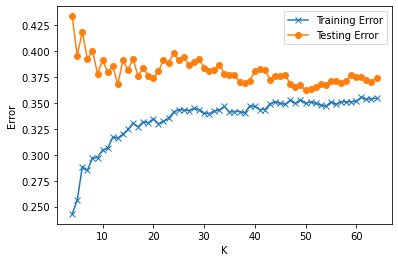

In [287]:
# Plot the accurcy trend 
training_error=list()
testing_error=list()

for i in range(4, 65):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train, y_train)
    training_error.append(1.0-accuracy_score(clf.predict(x_train), y_train))
    testing_error.append(1.0-accuracy_score(clf.predict(x_test), y_test))

# Plot the relationship
plt.plot(range(4, 65), training_error, marker='x', label='Training Error')
plt.plot(range(4, 65), testing_error, marker='o', label='Testing Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

# Hyper-parameter K in KNN

### Analysis
- Cross-validation is widely used approach for estimating test error.
- Estimates can be used to select best model, and to give an idea of the test error of the final chosen model.
- Idea is to randomly divide the data into 𝑘 equal-sized parts. We leave out one part, fit the model to the other 𝑘 − 1 parts (combined), and then obtain predictions for the left-out part.
- This is done in turn for each part 1, 2, . . . 𝑘, and then the results are combined.

In [291]:
# Create a KNN classifier model and use k-fold cross validation for testing accuracy estimation
# train the model

clf = KNeighborsClassifier(n_neighbors = 6)
scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy for each round: \n', scores)
print('Average accuracy: %.4f +- %.4f' % (scores.mean(), scores.std()))

Accuracy for each round: 
 [0.6 0.7 0.8 0.7 0.5]
Average accuracy: 0.6600 +- 0.1020


In [292]:
# Define search space for parameters
# parameters= {n_neighbours : range(4,65)}
parameter_grid = {'n_neighbors': range(4, 65)}

# Create the machine learning model
knn_clf= KNeighborsClassifier()
clf= GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=5)
clf.fit(X, y)

# Identify the best parameter(s)
# calculate the accuracy_score
print('Best K value: ', clf.best_params_['n_neighbors'])
print('The accuracy: ', clf.best_score_)

Best K value:  4
The accuracy:  0.68


## Analysis

KNN is a supervised learning algorithm for classification and also possible for regression. For KNN, overfitting occurs if K is too small. The accuracy reported here is 0.68 and the best K-value is 4.